<a href="https://colab.research.google.com/github/GaiaFL/Projet-Cassiopee/blob/main/Modelo1_gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ast
from sklearn.metrics import mean_squared_error
from math import sqrt
import gdown

# import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
from pprint import pprint

# helpers
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# estimators
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = 'https://docs.google.com/spreadsheets/d/1ko0Ly0EcOsKuEj-cCBOkM4CH2cfJKJeC/edit?usp=sharing'
file_id = url.split('/')[-2]

# URL de download do arquivo
download_url = f'https://drive.google.com/uc?id={file_id}'

# Caminho local para salvar o arquivo
output_path = '/content/drive/MyDrive/Prediction/Database.xlsx'

# Faz o download do arquivo do Google Drive
gdown.download(download_url, output_path, quiet=False)

# Lê o arquivo Excel com o pandas
data = pd.read_excel(output_path)

Downloading...
From: https://drive.google.com/uc?id=1ko0Ly0EcOsKuEj-cCBOkM4CH2cfJKJeC
To: /content/drive/MyDrive/Prediction/Database.xlsx
100%|██████████| 11.3k/11.3k [00:00<00:00, 26.7MB/s]


In [4]:
#path='/content/drive/MyDrive/Prediction/Database.xlsx'
data = pd.read_excel(output_path)
data = data.drop(data.columns[[1, 2]], axis=1)
data.columns = ["Coordinates", "1", "2", "3", "Average", 'MAC']
data['Average'] = data['Average'].apply(pd.to_numeric)
data[['Tag', 'Coordinates']] = data.pop('Coordinates').str.split('-', n=1, expand=True)
data['Coordinates'] = data['Coordinates'].apply(ast.literal_eval).apply(pd.to_numeric)
print(data)

     1   2   3    Average                MAC                 Tag  \
0  -75 -73 -73 -73.666667  04:da:d2:90:09:6e  Forum Exit Maisel    
1  -68 -68 -66 -67.333333  04:da:d2:90:09:6e               Exit    
2  -51 -53 -57 -53.666667  04:da:d2:90:09:6e        Exit Amph10    
3  -46 -46 -46 -46.000000  04:da:d2:90:09:6e              B map    
4  -60 -61 -58 -59.666667  04:da:d2:90:09:6e    Exit Main Forum    
5  -56 -53 -56 -55.000000  04:da:d2:90:09:6e         Exit ABCDE    
6  -55 -55 -50 -53.333333  04:da:d2:90:09:6e       Exit Gumnase    
7  -53 -53 -57 -54.333333  04:da:d2:90:09:6e               Nova    
8  -42 -39 -40 -40.333333  20:bb:c0:4b:a1:be             Door B    
9  -51 -49 -46 -48.666667  20:bb:c0:4b:a1:be           B middle    
10 -59 -57 -56 -57.333333  20:bb:c0:4b:a1:be          Corner BD    
11 -51 -49 -50 -50.000000  50:06:04:66:72:0e           D middle    
12 -58 -57 -61 -58.666667  50:06:04:5b:3e:ce         Corner ACD    
13 -48 -49 -52 -49.666667  50:16:7e:13:20:8e    

<ipython-input-5-440d0c0f094f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


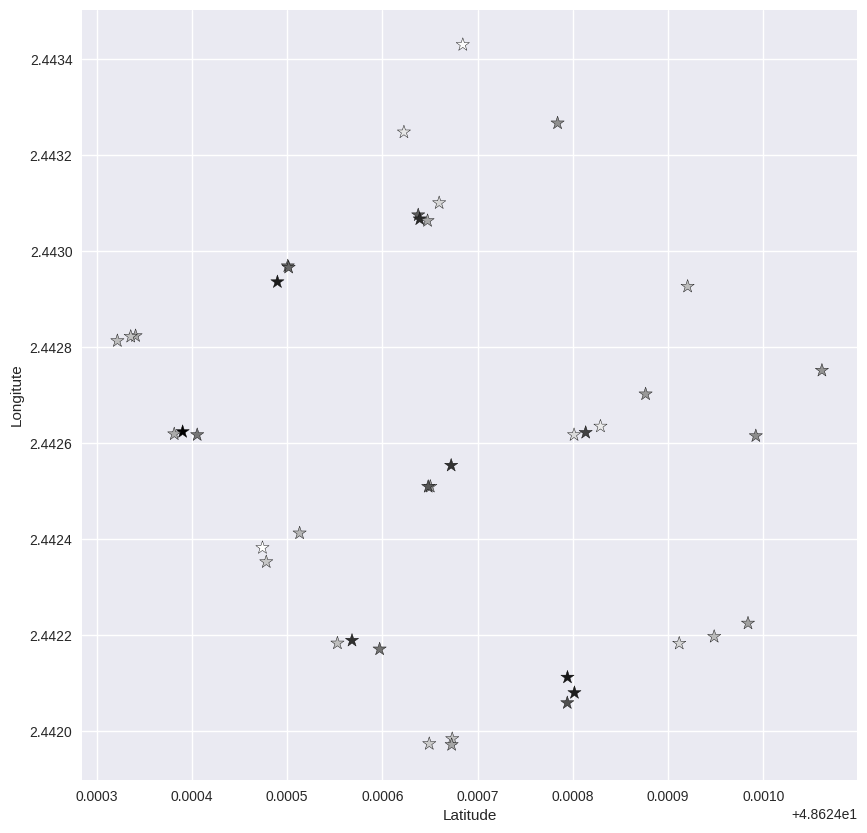

In [5]:
#Each star represents a point in the map, and the darker the star, the higher the average RSSI captured
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(data['Coordinates'].str[0], data['Coordinates'].str[1], c = data['Average'], marker= '*',s=100,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Longitute")
plt.show()

# Split Dataset

In [6]:
x = data['Average'].values.reshape(-1,1)
y = data['Coordinates'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [7]:
print('X_train\n', X_train)

print('X_test\n', X_test)

print('y_train\n', y_train)

print('y_test\n', y_test)

X_train
 [[-55.66666667]
 [-60.33333333]
 [-53.66666667]
 [-64.        ]
 [-41.33333333]
 [-38.        ]
 [-41.        ]
 [-63.66666667]
 [-57.33333333]
 [-40.33333333]
 [-49.66666667]
 [-55.        ]
 [-68.33333333]
 [-60.33333333]
 [-62.        ]
 [-54.33333333]
 [-60.        ]
 [-67.33333333]
 [-34.66666667]
 [-58.66666667]
 [-74.66666667]
 [-44.33333333]
 [-53.33333333]
 [-56.66666667]
 [-61.33333333]
 [-43.        ]
 [-48.66666667]
 [-47.66666667]
 [-46.        ]
 [-73.66666667]]
X_test
 [[-56.        ]
 [-39.        ]
 [-57.        ]
 [-59.66666667]
 [-57.33333333]
 [-45.33333333]
 [-59.66666667]
 [-50.        ]
 [-59.33333333]
 [-65.        ]
 [-38.33333333]]
y_train
 [array([48.6246504,  2.4425097]) array([48.6243359,  2.4428222])
 array([48.624784 ,  2.4432668]) array([48.6246597,  2.4431005])
 array([48.6246723,  2.4425536]) array([48.6247944,  2.4421121])
 array([48.6245682,  2.4421889]) array([48.6249117,  2.4421828])
 array([48.6243816,  2.442619 ]) array([48.6246393,  2.4

# Algo1


In [8]:
# prepare models
algos_Class = []
algos_Class.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy')))
algos_Class.append(('Random Forest', RandomForestClassifier()))
algos_Class.append(('Support Vector Machines', SVC(kernel='rbf')))
algos_Class.append(('K Nearest Neighbors', KNeighborsClassifier()))

In [9]:
# filter warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [14]:
# evaluate each model in turn on oob2
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, x, y, cv=3, scoring='accuracy')
    names.append(name)
    #results.append(result)

ValueError: ignored

In [13]:
for i in range(len(names)):
    print(names[i], results[i].mean(), results[i].std())

IndexError: ignored